In [1]:
import pandas as pd
import numpy as np
import pingouin as pg

**1.Soru** :  Pandas kütüphanesiyle bir DataFrame oluşturup ve içine Levels of Measurements'ları nominal, ordinal, interval ve ratio olan kolonlar ekleyelim.

In [2]:
name=['Smoky','Luna','Duman', 'Şila', 'Thor'] 
breed=["Kedi","Kedi","Kuş","Kuş","Köpek"]
age=[4,3,2,3,1]
weight_status=["Obez", "Kilolu", "Normal", "Normal", "Zayıf"]
adoption_order=["1.", "3.", "4.", "2.","5."]
variables={"Name": name,"Breed":breed ,"Age":age,"Weight Ststus":weight_status,"Adoption Order": adoption_order}
pd.DataFrame(variables)


,Name,Breed,Age,Weight Ststus,Adoption Order
0,Smoky,Kedi,4,Obez,1.
1,Luna,Kedi,3,Kilolu,3.
2,Duman,Kuş,2,Normal,4.
3,Şila,Kuş,3,Normal,2.
4,Thor,Köpek,1,Zayıf,5.


1. Cins kolonu *nominal* değerdir.
2. Yaş kolonu *ratio* değerdir.
3. Kilo Durumu kolonu *ordinal* değerdir.
4. Sahiplenilme Sırası kolonu *interval* değerdir.

***Verilen Data***

In [3]:
givenData = pd.read_csv ('data.csv')

In [4]:
givenData

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**2. Soru:** Ekli data üzerindeki aşağıda yer alan kolonların count, mean, std, min, 25%, 50%, 75%, max değerlerini ve IQR metoduyla outlier kalan veri sayısını çıkartıp, bu değerleri sözel ve karşılaştırmalı olarak yorumlayalım.

In [5]:
givenData_column = givenData.loc[:,["radius_mean", "area_mean", "compactness_mean"]]
givenData_column

,radius_mean,area_mean,compactness_mean
0,17.99,1001.0,0.27760
1,20.57,1326.0,0.07864
2,19.69,1203.0,0.15990
3,11.42,386.1,0.28390
4,20.29,1297.0,0.13280
...,...,...,...
564,21.56,1479.0,0.11590
565,20.13,1261.0,0.10340
566,16.60,858.1,0.10230
567,20.60,1265.0,0.27700


In [6]:
givenData_column.describe()

,radius_mean,area_mean,compactness_mean
count,569.000000,569.000000,569.000000
mean,14.127292,654.889104,0.104341
std,3.524049,351.914129,0.052813
min,6.981000,143.500000,0.019380
25%,11.700000,420.300000,0.064920
50%,13.370000,551.100000,0.092630
75%,15.780000,782.700000,0.130400
max,28.110000,2501.000000,0.345400


In [7]:
givenData_B = givenData[givenData["diagnosis"] == "B"]
givenData_M = givenData[givenData["diagnosis"] == "M"]

rm_desc = givenData_B.radius_mean.describe()
Q1 = rm_desc[4]
Q3 = rm_desc[6]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("Anything outside this range is an outlier for radius_mean: (" , lower_bound, "," , upper_bound, ")")

givenData_B[givenData_B.radius_mean < lower_bound].radius_mean
print ("Outliers for radius_mean: ", givenData_B[(givenData_B.radius_mean < lower_bound) | (givenData_B.radius_mean > upper_bound)].radius_mean.values)

am_desc = givenData_B.area_mean.describe()
Q1 = am_desc[4]
Q3 = am_desc[6]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("Anything outside this range is an outlier for area_mean: (" , lower_bound, "," , upper_bound, ")")

givenData_B[givenData_B.area_mean < lower_bound].area_mean
print ("Outliers for area_mean: ", givenData_B[(givenData_B.area_mean < lower_bound) | (givenData_B.area_mean > upper_bound)].area_mean.values)

cm_desc = givenData_B.compactness_mean.describe()
Q1 = cm_desc[4]
Q3 = cm_desc[6]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("Anything outside this range is an outlier for compactness_mean: (" , lower_bound, "," , upper_bound, ")")

givenData_B[givenData_B.compactness_mean < lower_bound].compactness_mean
print ("Outliers for compactness_mean: ", givenData_B[(givenData_B.compactness_mean < lower_bound) | (givenData_B.compactness_mean > upper_bound)].compactness_mean.values)

Anything outside this range is an outlier for radius_mean: ( 7.645000000000001 , 16.805 )
Outliers for radius_mean:  [ 6.981 16.84  17.85 ]
Anything outside this range is an outlier for area_mean: ( 118.84999999999997 , 810.45 )
Outliers for area_mean:  [880.2 838.1 992.1 819.8]
Anything outside this range is an outlier for compactness_mean: ( -0.00727499999999999 , 0.160445 )
Outliers for compactness_mean:  [0.2233 0.1807 0.1676 0.1972 0.166  0.1836 0.2239 0.2204 0.1661]


1. *Radius_mean* ->  
    - mean ve median değerlerine bakarsak mean değerimiz *14.127292*, median değerimiz ise *13.370000*. Bu değerler ışığında dağılım için normal diyemeyiz ancak normale yakın olduğu için tercih edilebilir.
    - Bunlar dışında quarties değerlerimizden bahsedecek olursak IQR değerlerimiz *(7.645000000000001 , 16.805)* aralığında olmalı. Bunların dışında kalan *6.981, 16.84, 17.85* değerlerimiz bizim outlier değerlerimiz.
    - min ve max değerlerimiz outlier. 
2. *Area_mean* ->
    - mean ve median mean ve median değerlerine bakarsak mean değerimiz *654.889104*, median değerimiz ise *551.100000*. Bu değerler ışığında dağılım için normal diyemeyiz hatta aksine çarğık bir dağılım olabilir. Bu sebeple bu dağılımı seçerken dikkat etmeliyiz.
     - Bunlar dışında quarties değerlerimizden bahsedecek olursak IQR değerlerimiz *(118.84999999999997 , 810.45)* aralığında olmalı. Bunların dışında kalan *880.2, 838.1, 992.1, 819.8* değerlerimiz bizim outlier değerlerimiz.
    - Sadece max değerimiz outlier.
3. *Compactness_mean* ->
     - mean ve median mean ve median değerlerine bakarsak mean değerimiz *654.889104*, median değerimiz ise *551.100000*. Bu değerler ışığında dağılım için normal diyemeyiz hatta aksine çarğık bir dağılım olabilir. Bu sebeple bu dağılımı seçerken dikkat etmeliyiz.
     - Bunlar dışında quarties değerlerimizden bahsedecek olursak IQR değerlerimiz *(-0.00727499999999999 , 0.160445)* aralığında olmalı. Bunların dışında kalan *0.2233, 0.1807, 0.1676, 0.1972, 0.166, 0.1836, 0.2239, 0.2204, 0.1661* değerlerimiz bizim outlier değerlerimiz. Çok fazla outlier değerimiz var. Sample seçimi için negatif bir durum.
    - Sadece max değerimiz outlier.

**3.Soru:** Ekli data üzerindeki aşağıda yer alan kolonların birbirleriyle olan korelasyonlarını, covaryanslarını, Pearson Correlation Coefficientlarını, Spearman Rank Coefficientlarını ve Effect Size'larını bularak sözel ve karşılaştırmalı olarak yorumlayalım.

In [8]:
givenData_corr = givenData_column.corr() #korelasyon
givenData_corr

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.987357,0.506124
area_mean,0.987357,1.000000,0.498502
compactness_mean,0.506124,0.498502,1.000000


In [9]:
givenData_cov = givenData_column.cov() #covaryans
givenData_cov

,radius_mean,area_mean,compactness_mean
radius_mean,12.418920,1224.483409,0.094197
area_mean,1224.483409,123843.554318,9.264931
compactness_mean,0.094197,9.264931,0.002789


In [10]:
givenData_corrP = givenData_column.corr(method = "pearson") #Pearson Correlation Coefficientları
givenData_corrP

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.987357,0.506124
area_mean,0.987357,1.000000,0.498502
compactness_mean,0.506124,0.498502,1.000000


In [11]:
givenData_corrS = givenData_column.corr(method = "spearman") #Spearman Rank Coefficientları
givenData_corrS

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.999602,0.497578
area_mean,0.999602,1.000000,0.488988
compactness_mean,0.497578,0.488988,1.000000


In [12]:
givenData_ra = pg.compute_effsize(givenData.radius_mean, givenData.area_mean, eftype = "cohen") #radius_mean to area_mean
print("Effect Size of radius_mean and area_mean: ", givenData_ra)

Effect Size of radius_mean and area_mean:  -2.5748571535813936


In [13]:
givenData_rc = pg.compute_effsize(givenData.radius_mean, givenData.compactness_mean, eftype = "cohen") ##radius_mean to compactness_mean
print("Effect Size of radius_mean and compactness_mean: ", givenData_rc)

Effect Size of radius_mean and compactness_mean:  5.626829112228556


In [14]:
givenData_ac = pg.compute_effsize(givenData.area_mean, givenData.compactness_mean, eftype = "cohen") ##area_mean to compactness_mean
print("Effect Size of area_mean and compactness_mean: ", givenData_ac)

Effect Size of area_mean and compactness_mean:  2.6313393087695855


- radius_mean & area_mean:
    - Aralarındaki korelasyon *0.987357*. Değer 1'e yakın olduğu için kuvvet çok yüksek diyebiliriz.
    - Korelasyon değeri pozitif olduğu içn doğrusal bir yapıdadır.
    - Kovaryans değerlerine baktığımız zaman değerin pozitif olduğunu görüyoruz. Bu da bize bu iki değer değer arasında aynı yönde bir bağ olduğunu gösterir.
    - *Pearson Correlation Coefficient* değeri ve *Spearman Rank Coefficient* değeri birbirine oldukça yakın.
    
- radius_mean & compactness_mean:
    - Aralarındaki korelasyon *0.506124*. Değer *(0.4-0.6)* aralığında olduğu için kuvveti orta seviyedir.
    - Korelasyon değeri pozitif olduğu içn doğrusal bir yapıdadır.
    - Kovaryans değerlerine baktığımız zaman değerin pozitif olduğunu görüyoruz. Bu da bize bu iki değer değer arasında aynı yönde bir bağ olduğunu gösterir.
    - *Pearson Correlation Coefficient* değeri ve *Spearman Rank Coefficient* değeri birbirine oldukça yakın.
    
- area_mean & compactness_mean:
    - Aralarındaki korelasyon *0.498502*. Değer *(0.4-0.6)* aralığında olduğu için kuvveti orta seviyedir.
    - Korelasyon değeri pozitif olduğu içn doğrusal bir yapıdadır.
    - Kovaryans değerlerine baktığımız zaman değerin pozitif olduğunu görüyoruz. Bu da bize bu iki değer değer arasında aynı yönde bir bağ olduğunu gösterir.
    - *Pearson Correlation Coefficient* değeri ve *Spearman Rank Coefficient* değeri birbirine oldukça yakın.

**4.Soru:** Bayes Teoreminin gerçek hayatta karşımıza çıkan ve kullanılan örneklerinden 5 tane bulalım.

- Cevap:
    - İşe gitmek için evden çıktığımızda arabanın yanına geldiğimzde arabanın anahtarını unutuuğumuz o anda kafamızda nerede olacağını düşünmeye başlarız. Aslında bu Bayes teoremini kafamızda ihtimalleri düşünürken değerlendiririz. Eve gelmiş olmamız anahtarın iş yerinde değil evde olabileceğini gösterir. Böylelikle iş yerini eleriz. Daha sonra acaba evde nerede diye düşünürken koyma ihtimalimiz olmadığı buzdolabı ya çamaşır makinesi gibi yerleri de hesaba katmayız. Çalışma odası, girişteki anahtarlık, oturma odasında bir alan ya da bir önce ki gün giydiğimiz, kullandığımız kıyafetler ve aksesuarlar üzerinde dururuz. Bunlar bize Bayes teoreminin arkasındaki kesin mantığı sağlar.
    - Uzun zamandır araba kullanan biri bu zamana kadar hiç kaza yapmamış olabilir. Ancak bu bundan sonra da kaza yapmayacağı anlamına gelmez. Bu yüzden %100 olarak kaza yapmam denmez. Koşullu bir olasılığa sahibiz. O an kaza yapmaya neden olabilecek koşulları göz önünde bulundurmalıyız. Mesela ara. kullanırken yorgun olunabilir, uykusuz olunabilir, dalgın olunabilir, hava şartları kötü olabilir. Bu koşulları göz önünde bulundurarak ihtimaller hesaplanır.
    - İş yerlerinden bir örnek verecek olursak, patron işlerin çok iyi gittiğini ve işlerde bir aksama olmadığını ve olmayacağını düşünebilir. Ama buna %100 emin olamaz. İş yerinden bir çalışanın ayrılması ile diğer çalışanların üzerine iş yükü binebilir, çalışanlar arası bir çatışma çıkıp patrona yansıtılmamış olabilir. Bunlar iş gününde azalma ve verimlilikte azalmaya sebep olabilir. Bunlar birbirine bağlı koşullu olasılık içerir.
    - Hastalanıp hastaneye gittiğimizde söylediğimiz şikayetlere göre bizlerden tetkikler isterler. Burnumuz akıyor diye bizden kansermişiz bir tahlil istenmez. Söylediğimiz şikayetlere bağlı olarak olabilecek ihtimaller değerlendirilip ona göre tetkikler istenir. Bu tetkiklerin sonucunda bazı ihtimaller sıfırlanarak göz ardı edilir ve kalan ihtimaller üzerinden koşullu olasılıkla hastalıklar belirlenir. Tabi bu teorem her hastalık için kullanılmayabilir. Ancak genel olarak yapılan araştırmalarda önem arz ediyor. Menenjit olan hastaların bir kısmında boynunda sertleşme olabiliyor. Boyun sertliği ile gelen bir hastanın menenjit olma olasılığını bu teorem ile bulabiliriz.
    - Günümüzde malum kurtulmaya çalıştığımız bir hastalık var. Korona. Korona ile ilgili olasılıkları Bayes teoremi ile hesaplayabiliriz. Hastalığın aşıya olan bağımlılığı, 1.doz ve 2. doz aşıya olan bağımlılıkları hatta farklı içeriklere sahip aşılara olan bağımlılıkları bile hesapları çok etkiliyor. 


**5.Soru:** Poisson, Normal , Gamma, Weilbull ve Logaritmik dağılımların benzer ve farklı yönlerini bir tablo halinde çıkaralım.(Araştırma Ödevi)

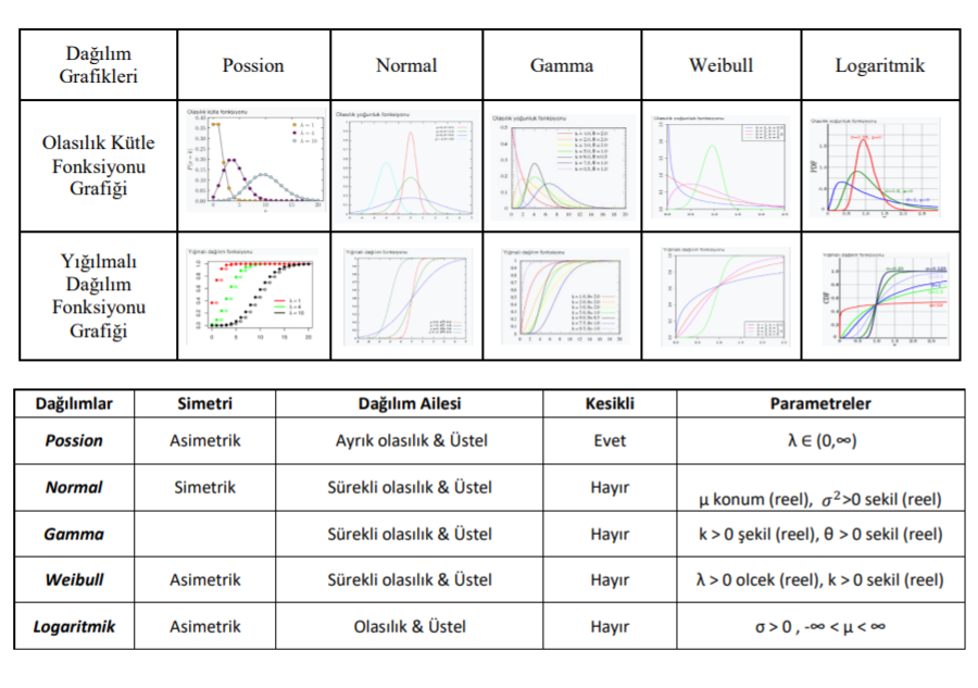